In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Dataset:
Creator:R.A. Fisher \
Donor:Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

In [20]:
cols = ["sepal length","sepal width","petal length", "petal width","class"]
df = pd.read_csv("iris.data",names = cols)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

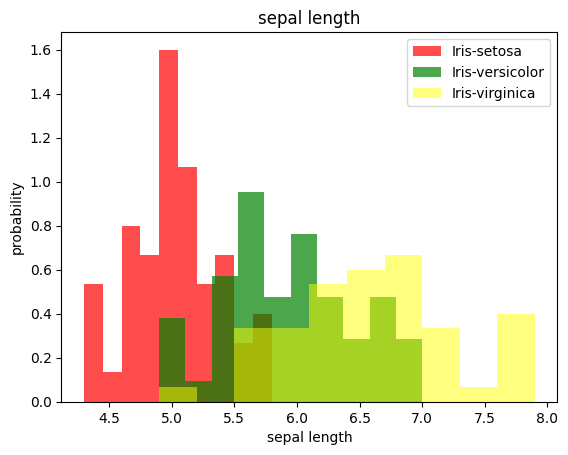

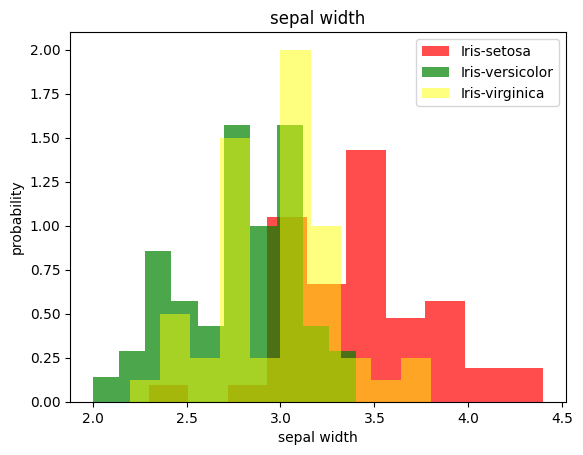

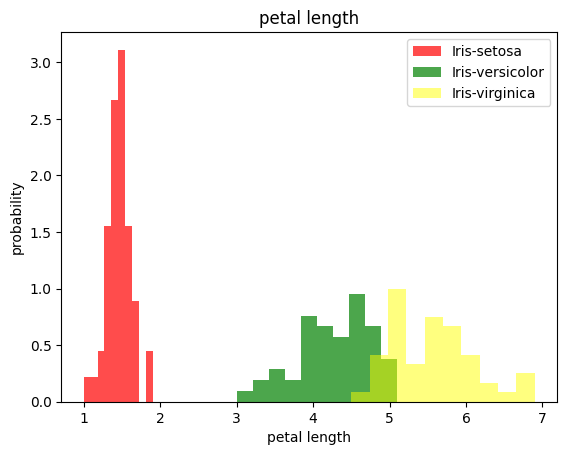

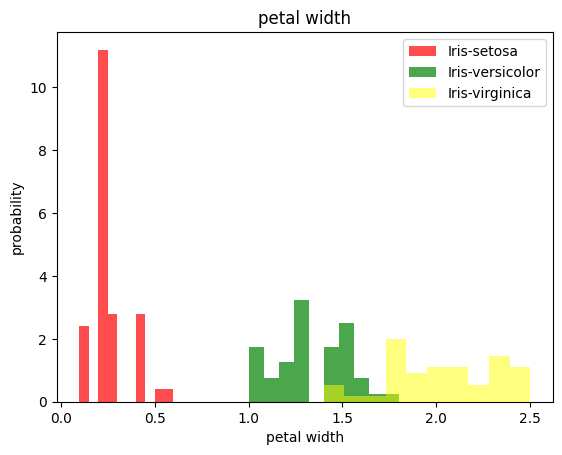

In [22]:
for label in cols[:-1]:
  plt.hist(df[df["class"]=="Iris-setosa"][label], color='red',label='Iris-setosa', alpha=0.7,density=True)
  plt.hist(df[df["class"]=="Iris-versicolor"][label], color='green',label='Iris-versicolor', alpha=0.7,density=True)
  plt.hist(df[df["class"]=="Iris-virginica"][label], color='yellow',label='Iris-virginica', alpha=0.5,density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

#Training, Validation and Testing data sets

In [23]:
train,test = np.split(df.sample(frac=1),[int(0.8*len(df))])
#sample() is used to take a random sample of the data
#frac=1 takes the entire fraction of the data
#split is used to split the data as 80 20

# Implementing different ML algorithms

In [24]:
train_x = train[cols[:-1]]
print(train_x.head())
train_y = train[cols[-1]]
print(train_y.head())

     sepal length  sepal width  petal length  petal width
146           6.3          2.5           5.0          1.9
103           6.3          2.9           5.6          1.8
132           6.4          2.8           5.6          2.2
63            6.1          2.9           4.7          1.4
89            5.5          2.5           4.0          1.3
146     Iris-virginica
103     Iris-virginica
132     Iris-virginica
63     Iris-versicolor
89     Iris-versicolor
Name: class, dtype: object


In [25]:
test_x = test[cols[:-1]]
print(test_x.head())
test_y = test[cols[-1]]
print(test_y.head())

     sepal length  sepal width  petal length  petal width
64            5.6          2.9           3.6          1.3
106           4.9          2.5           4.5          1.7
83            6.0          2.7           5.1          1.6
2             4.7          3.2           1.3          0.2
100           6.3          3.3           6.0          2.5
64     Iris-versicolor
106     Iris-virginica
83     Iris-versicolor
2          Iris-setosa
100     Iris-virginica
Name: class, dtype: object


## Logistic Regression


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR_model = LogisticRegression(max_iter=150)
LR_model.fit(train_x,train_y)
prediction = LR_model.predict(test_x)
print("Accuracy of Logistic Regression model: ", metrics.accuracy_score(prediction,test_y))

Accuracy of Logistic Regression model:  0.9


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
conf_matrix = confusion_matrix(test_y, prediction)
print("Confusion matrix:\n", conf_matrix)
print(classification_report(test_y,prediction))

Confusion matrix:
 [[10  0  0]
 [ 0 11  2]
 [ 0  1  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30



## K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#finding the value of k
k =round(len(train)**0.5/2)
print(k)

5


In [32]:
KNN_model = KNeighborsClassifier(n_neighbors = k)
KNN_model.fit(train_x,train_y)
prediction = KNN_model.predict(test_x)
print("Accuracy of K Nearest Neighbors model: ",metrics.accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

Accuracy of K Nearest Neighbors model:  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30



## Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
SVM_model = SVC()
SVM_model.fit(train_x,train_y)
prediction = SVM_model.predict(test_x)
print("Accuracy of Support Vector Machine model: ",metrics.accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

Accuracy of Support Vector Machine model:  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30



## Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
NB_model = GaussianNB()
NB_model.fit(train_x,train_y)
prediction = NB_model.predict(test_x)
print("Accuracy of Naive Bayes model: ",metrics.accuracy_score(test_y,prediction))
print(classification_report(test_y,prediction))

Accuracy of Naive Bayes model:  0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.67      0.86      0.75         7

       accuracy                           0.87        30
      macro avg       0.86      0.88      0.86        30
   weighted avg       0.88      0.87      0.87        30



# Conclusion
The Logistic Regression, KNN, and SVM model work better than Naive Bayes. Hence, we proceed with KNN for model training.